In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import signal
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller

In [4]:
path_original = "../../../data/vega_shrinkwrapper_original/NewBlade/NewBlade001_short.csv"
df_original = pd.read_csv(path_original)

# Visualisation - New Blade

## Scatterplot - original data

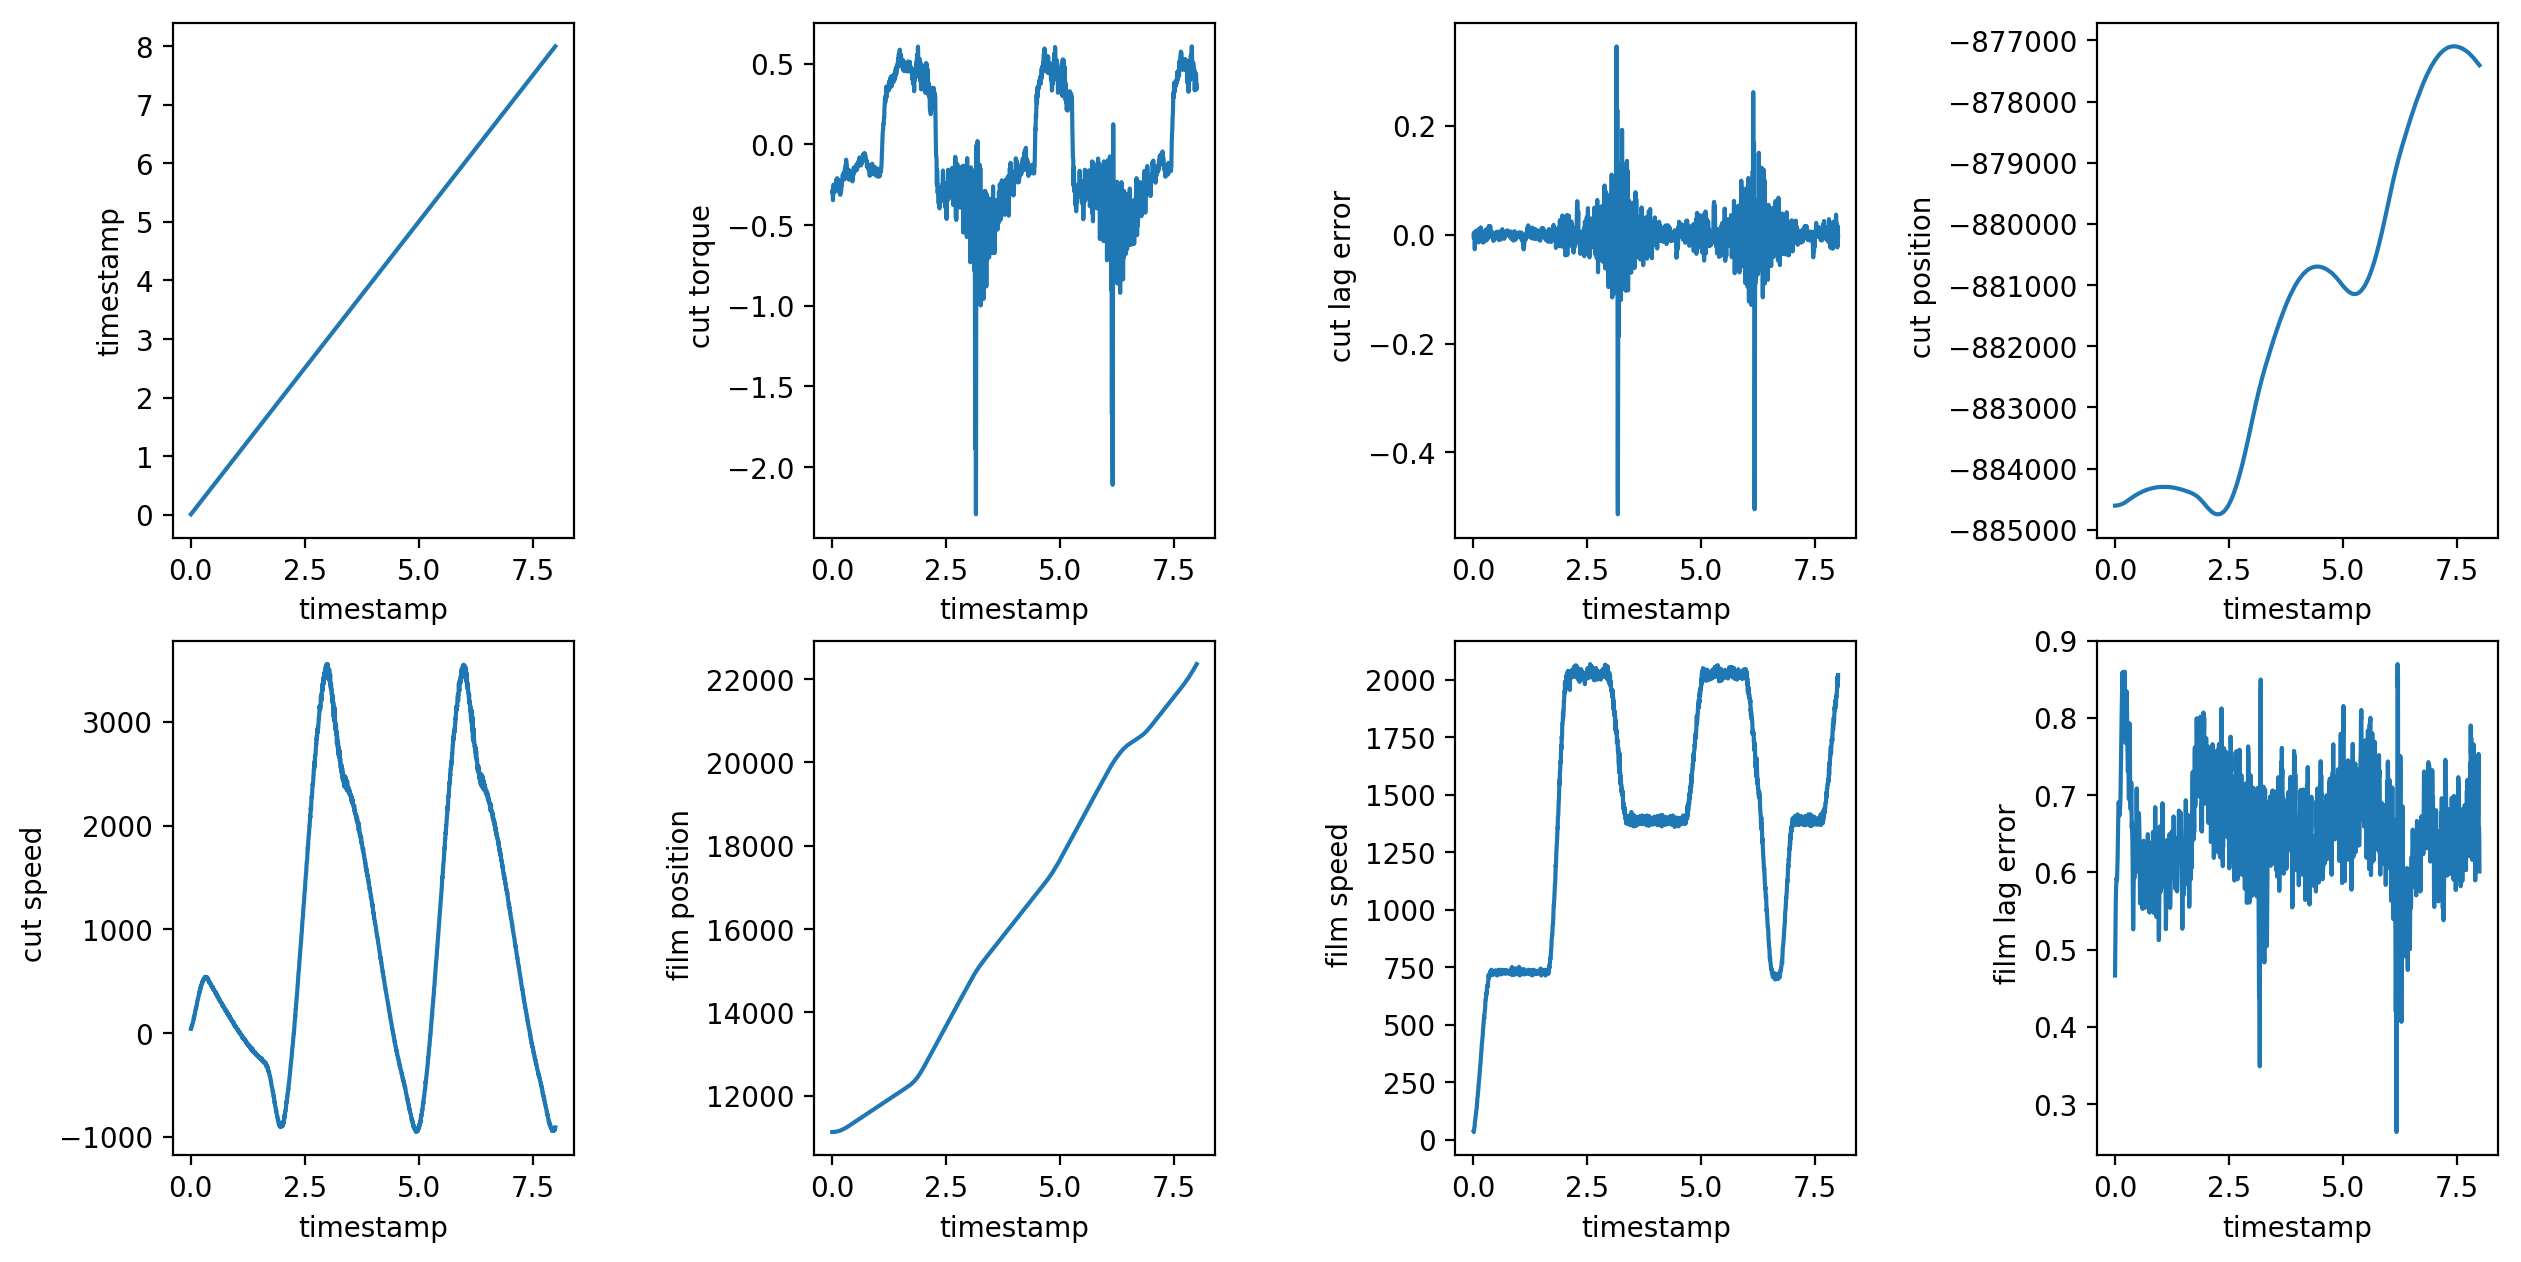

In [5]:
fig, axes = plt.subplots(2, 4, figsize=(15,7.5), dpi=200)
ax = axes.ravel()
plt.subplots_adjust(hspace=0.2, wspace=0.6)
for i in range(0,8):
    sns.lineplot(x=df_original.iloc[:,0] , y=df_original.iloc[:,i], ax=ax[i])
#plt.savefig("../graphs/raw_sensor_data.png")
plt.show()

## Some Statistics

In [4]:
df_original.describe()

,timestamp,cut torque,cut lag error,cut position,cut speed,film position,film speed,film lag error
count,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000
mean,3.906000,-0.077109,-0.000306,-881592.086426,878.606161,16150.827148,1371.617691,0.646027
std,2.365404,0.372693,0.038205,2661.658773,1317.007966,3597.327988,552.624403,0.085916
min,-0.188000,-2.292097,-0.513631,-884747.000000,-954.437256,11128.000000,-7.513016,0.259081
25%,1.859000,-0.304018,-0.009814,-884346.250000,-172.519684,12420.500000,743.789139,0.612427
50%,3.906000,-0.165394,-0.000182,-881146.000000,449.752808,16047.000000,1389.908569,0.652235
75%,5.953000,0.319277,0.009876,-879821.500000,2059.078125,19591.000000,1968.411041,0.693293
max,7.999999,0.606260,0.346109,-877098.000000,3556.823730,22360.000000,2068.584717,0.869679


## Correlation of sensor time series

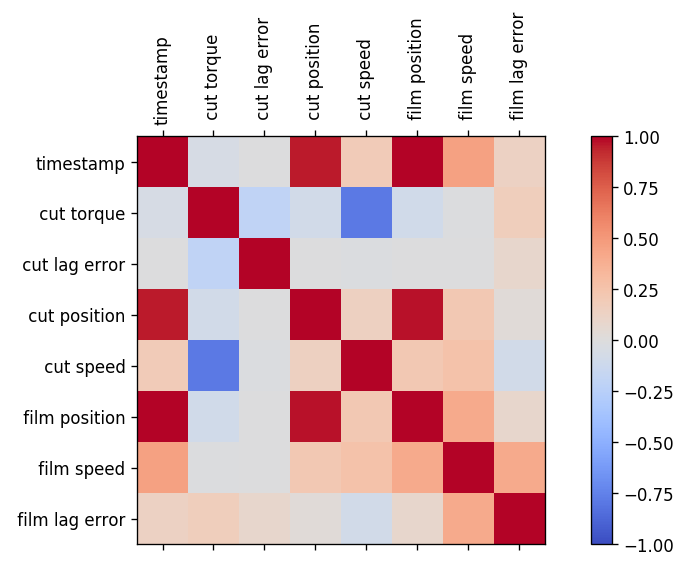

In [17]:
corr = df_original.corr()
fig = plt.figure(figsize=(10,4.5), dpi=120)
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(df_original.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(df_original.columns)
ax.set_yticklabels(df_original.columns)
plt.show()

## Autocorrelation

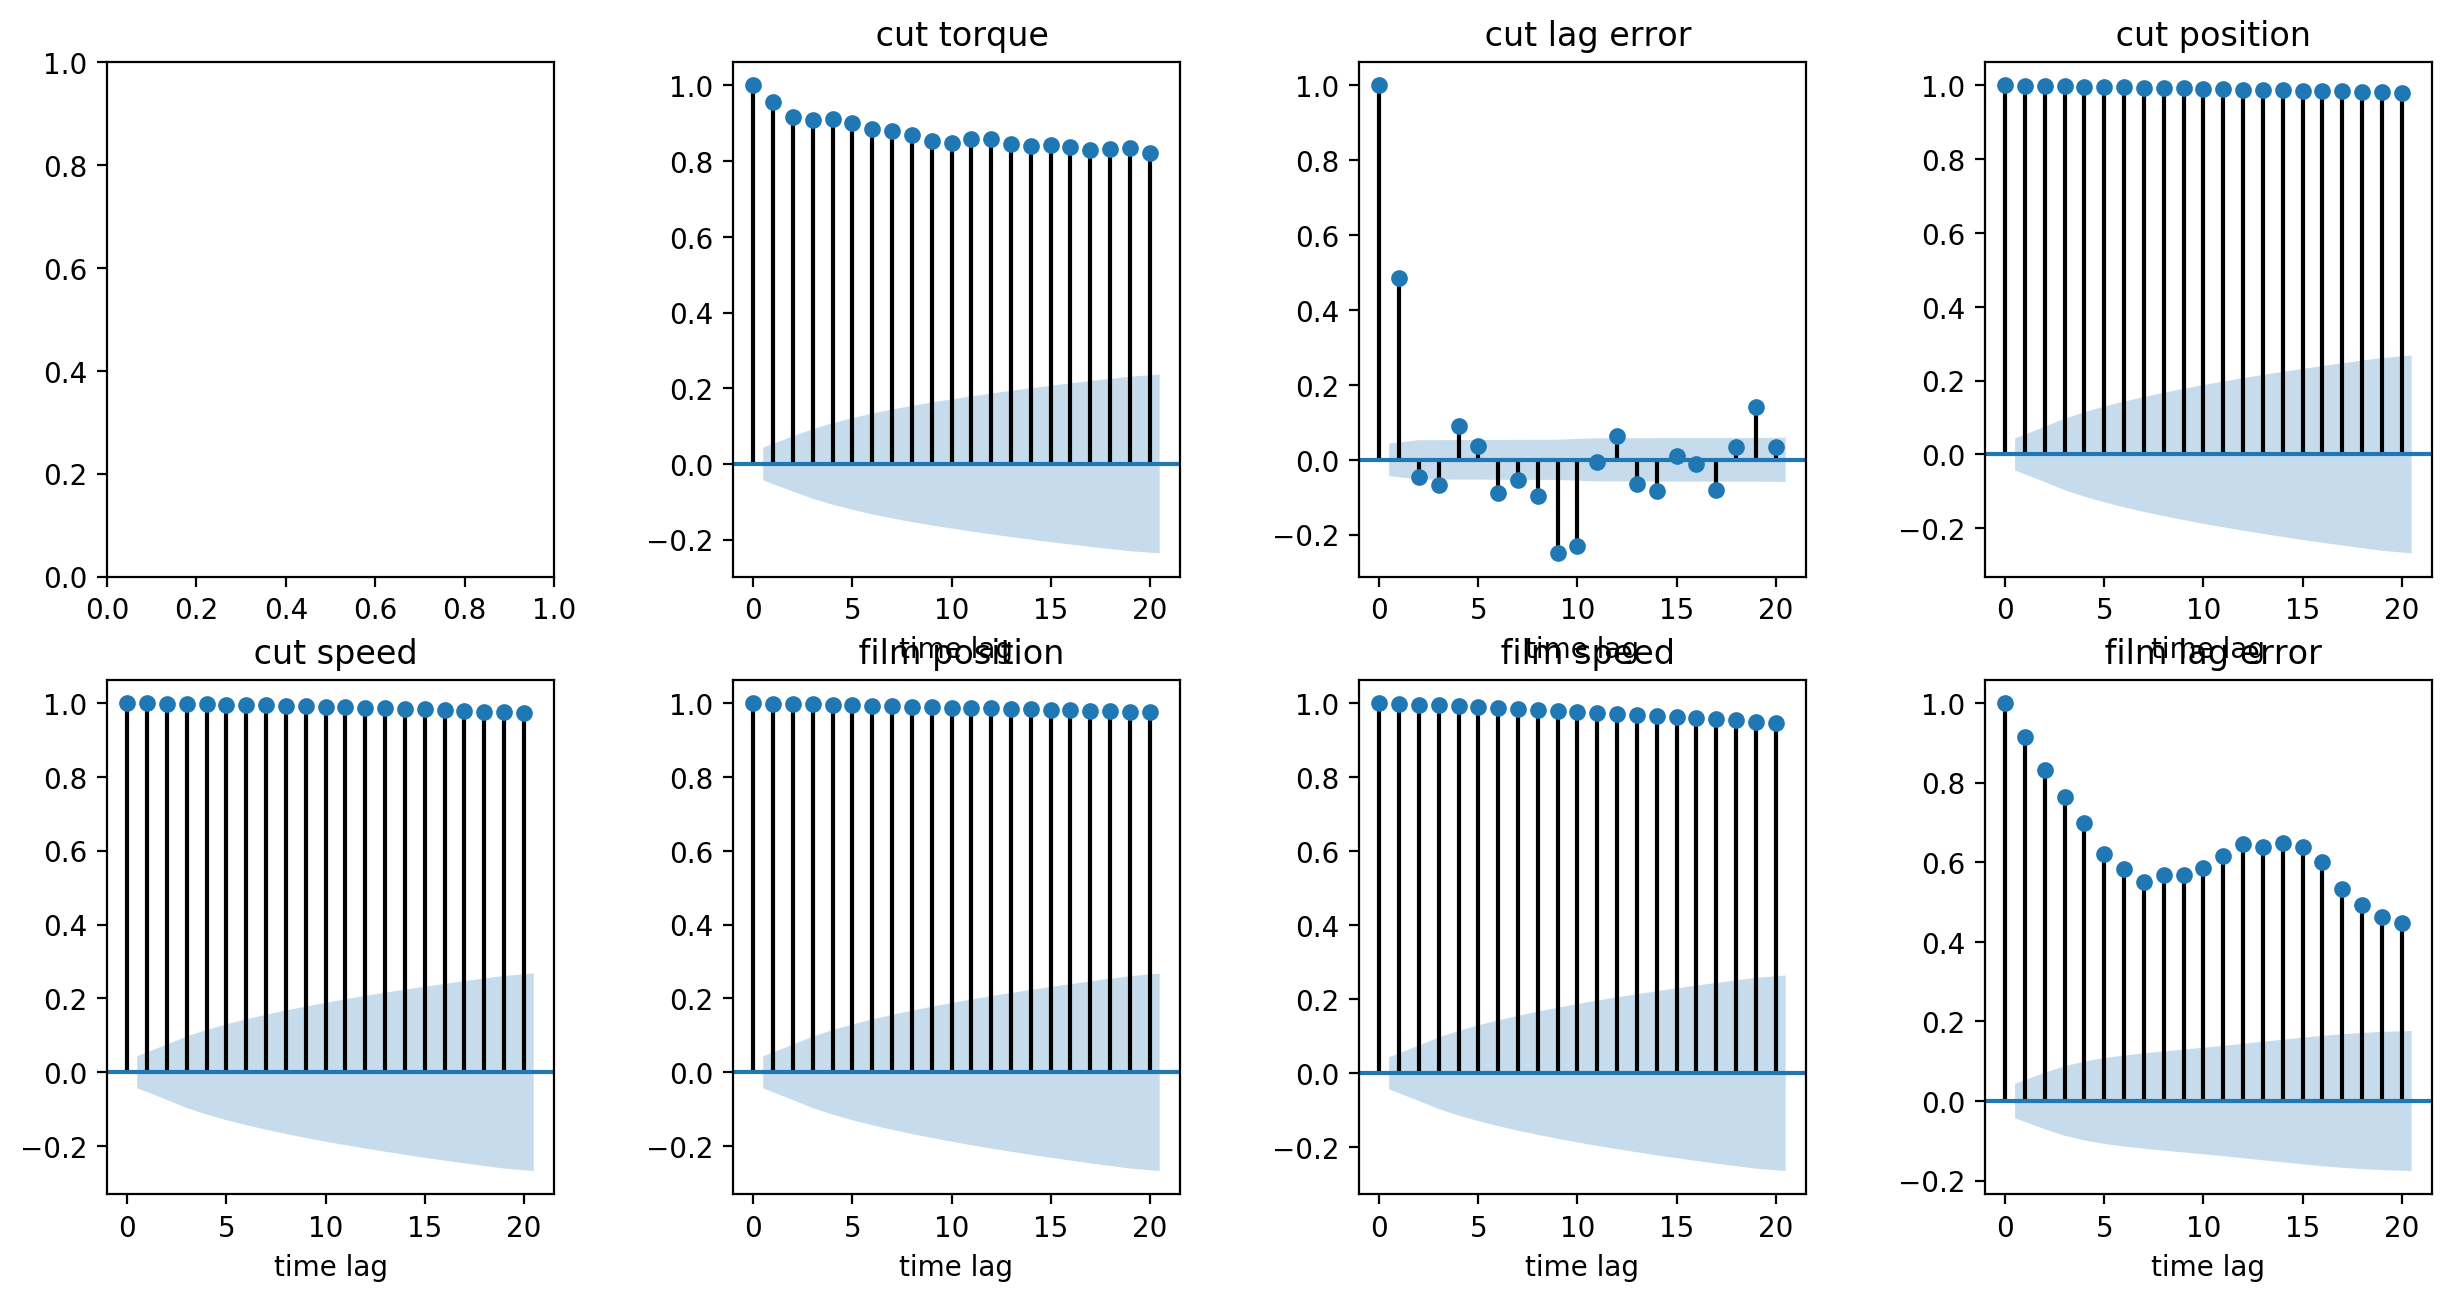

In [5]:
fig, axes = plt.subplots(2, 4, figsize=(15,7.5), dpi=200)
ax = axes.ravel()
plt.subplots_adjust(hspace=0.2, wspace=0.4)
for i in range(1, 8):
    plot_acf(df_original.iloc[:,i], lags=20, ax=ax[i])
    ax[i].set_title(df_original.columns[i])
    ax[i].set_xlabel('time lag')
#plt.savefig("../graphs/raw_sensor_data_autocorrelation.png")
plt.show()

## Histogramm 

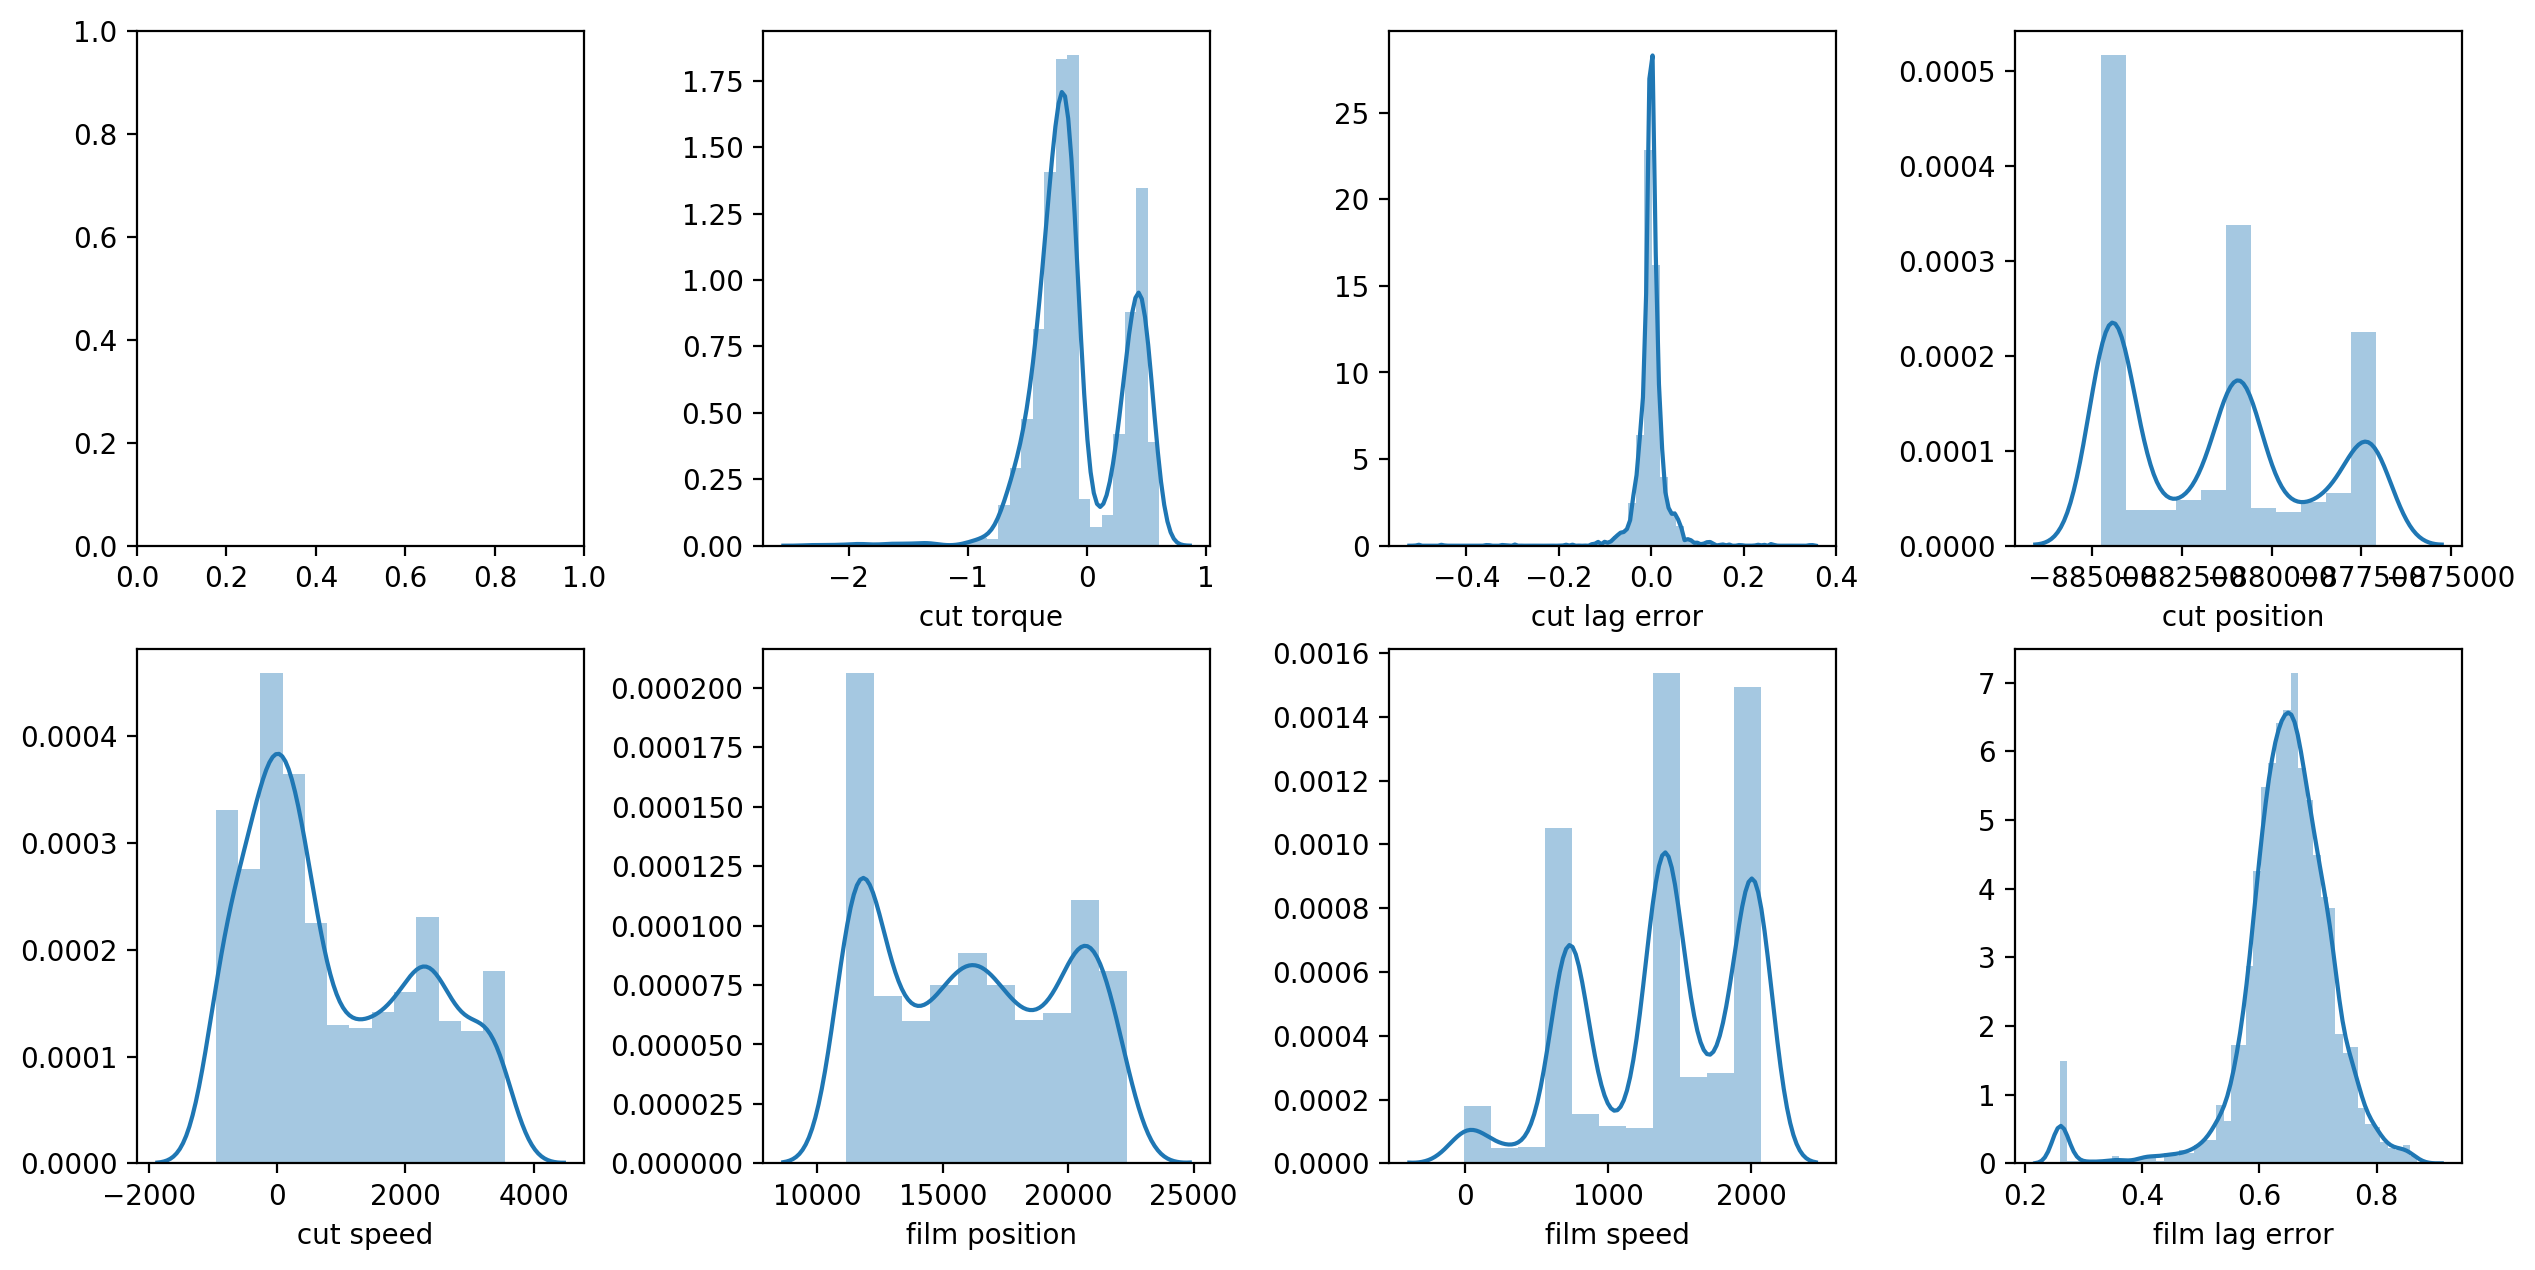

In [6]:
fig, axes = plt.subplots(2, 4, figsize=(15,7.5), dpi=200)
ax = axes.ravel()
plt.subplots_adjust(hspace=0.2, wspace=0.4)
for i in range(1, 8):
    sns.distplot(df_original.iloc[:,i], ax=ax[i])
#plt.savefig("../graphs/raw_sensor_data_histogramm.png")
plt.show()

## Augmented Dickey-Fuller Test for Testing Stationarity
If failed to be rejected, it suggests the time series has a unit root, meaning it is non-stationary. It has some time dependent structure. <br>
p-value > 0.05: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary. <br>
Following time series are non-stationary:
- cut torque
- cut position
- film position

In [35]:
for i in range(1, len(df_original.columns)):
    time_series = df_original.iloc[:,i].values
    result = adfuller(time_series)
    print("Test for: {}".format(df_original.columns[i]))
    print('p-value: {}'.format(result[1]))
    if result[1] >= 0.05:
        print("Time series is non-stationary")
    else:
        print("Time series is stationary")
    print('-'*10)

Test for:  cut torque
p-value: 0.43534413514423626
Time series is non-stationary
----------
Test for:  cut lag error
p-value: 2.236940529337871e-22
Time series is stationary
----------
Test for:  cut position
p-value: 0.9896568837161605
Time series is non-stationary
----------
Test for:  cut speed
p-value: 0.0009507188922427477
Time series is stationary
----------
Test for:  film position
p-value: 0.9972743985640546
Time series is non-stationary
----------
Test for:  film speed
p-value: 0.03263445513845521
Time series is stationary
----------
Test for:  film lag error
p-value: 3.517184441771387e-08
Time series is stationary
----------
